<a href="https://colab.research.google.com/github/guidomoor/FEA-ML/blob/main/Normalized_NN_for_Ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ke prediction**

the dataframe is extracted from single element simulations where multiple nodes are being displaced (here in the picture nodes 3 and 4). The element is a 2D plain stress element fully integrated:

4--------3
         
1--------2


*   Input: COORD is a 8x1 array = [coord11, coord12, coord21, coord22, ..., coord44]
*   Output: Ke is a 36x1 array = [K11, K21, ..., K88]

In total is therefore a 8 inputs - 36 outputs system

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
 #Create a model that inherits nn.Module
 class Model(nn.Module):
  #Input Layer (4 features of flower) -->
  #Hidden Layer 1 (#of neurons) -->
  #H2 --> Output
  #(3 classes of flowers)
  def __init__(self, in_features=8, h1=64, h2=128, h3= 64, out_features=36):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  #this function is pushing the information forward through the layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectify linear unit function relu
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)
    return x

In [15]:
torch.manual_seed(42)
model = Model()

In [16]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    my_df = pd.read_csv(filename, header=None)  # Read the CSV file into a DataFrame


Saving NN_for_Ke_Normalized.csv to NN_for_Ke_Normalized (1).csv
Uploaded file: NN_for_Ke_Normalized (1).csv


In [17]:
my_df


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.172414,-0.172414,0.127698,0.053878,...,-0.003381,0.090106,-0.003381,-0.066312,0.025918,-0.023404,-0.008451,-0.000390,-0.014086,0.090106
1,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.172414,-0.344828,0.120327,0.042350,...,-0.006336,0.127349,0.005709,-0.058982,0.027888,-0.030692,-0.011407,-0.007206,-0.022190,0.096880
2,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.344828,-0.172414,0.154200,0.059831,...,-0.002337,0.078735,-0.007496,-0.043332,0.025222,-0.014937,-0.007407,-0.013090,-0.010319,0.071360
3,0.172414,-0.344828,0.172414,-0.172414,0.172414,0.344828,-0.344828,-0.344828,0.140562,0.049874,...,-0.004571,0.111801,-0.000119,-0.037356,0.026712,-0.022692,-0.009642,-0.019206,-0.016950,0.079254
4,0.172414,-0.344828,0.172414,-0.172414,0.344828,0.172414,-0.172414,-0.172414,0.064614,0.030521,...,-0.010519,0.108189,0.015045,-0.046025,0.030677,-0.032380,-0.015590,-0.004674,-0.030132,0.083079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,0.344828,-0.351724,0.344828,-0.165517,0.337931,0.372414,-0.172414,-0.400000,0.089053,0.031398,...,-0.007099,0.124843,0.012582,-0.060990,0.031208,-0.037773,-0.012169,0.000230,-0.031621,0.098533
2269,0.344828,-0.351724,0.344828,-0.165517,0.337931,0.372414,-0.344828,-0.227586,0.105155,0.045127,...,-0.003006,0.083825,0.001154,-0.047474,0.028210,-0.026440,-0.008077,-0.003246,-0.021286,0.077161
2270,0.172414,-0.179310,0.172414,-0.441379,0.337931,0.200000,-0.344828,-0.227586,0.097174,0.018774,...,0.012478,0.090825,-0.003925,-0.032143,0.040169,-0.076353,0.007407,0.011048,-0.043651,0.097447
2271,0.172414,-0.179310,0.172414,-0.165517,0.337931,0.200000,-0.172414,-0.227586,0.079446,0.024968,...,-0.002779,0.137212,0.011650,-0.031536,0.036774,-0.049915,-0.007850,-0.007450,-0.040574,0.088901


In [18]:
# Assuming my_df has 44 columns
X = my_df.iloc[:, :8]  # Select the first 8 columns (Coord): input
y = my_df.iloc[:, 8:]   # Select the last 36 columns (Ke): output
#convert to numpy arrays
#Data used in the NN
X = X.values
y = y.values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Combine inputs and outputs into a single array for proper splitting
data = np.hstack((X, y))

# Ensure data is unique
unique_data = np.unique(data, axis=0)

# Split the unique data into training and validation sets
train_data, val_data = train_test_split(unique_data, test_size=0.1, random_state=42)

# Separate inputs (X) and outputs (y) for training and validation
X_train, y_train = train_data[:, :8], train_data[:, 8:]
X_test, y_test = val_data[:, :8], val_data[:, 8:]

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [21]:
#Train Test Slip
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
# Convert your datasets to PyTorch tensors
#X_train = torch.FloatTensor(X_train)  # Inputs should be Float
#X_test = torch.FloatTensor(X_test)    # Inputs should be Float

# If y_train and y_test are initially NumPy arrays
#y_train = np.array(y_train, dtype=float)  # Ensure they are float arrays
#y_test = np.array(y_test, dtype=float)    # Ensure they are float arrays

# Convert to PyTorch FloatTensor
#y_train = torch.FloatTensor(y_train)  # Convert to FloatTensor
#y_test = torch.FloatTensor(y_test)    # Convert to FloatTensor



In [23]:
print(f'X train: {X_train}')
print(f'X test: {X_test}')
print(f'y train: {y_train}')
print(f'y test: {y_test}')

X train: tensor([[ 0.4276, -0.3448,  0.4276,  ...,  0.3448, -0.3448, -0.3448],
        [ 0.1724, -0.3448,  0.1724,  ...,  0.3448, -0.3448, -0.3448],
        [ 0.3448, -0.1724,  0.3448,  ...,  0.3448, -0.1724, -0.3448],
        ...,
        [ 0.8621, -0.1724,  0.8621,  ...,  0.8621, -0.8621, -0.8621],
        [ 0.6069, -0.4345,  0.6069,  ...,  0.6069, -0.4345, -0.6069],
        [ 0.8621, -0.1724,  0.8621,  ...,  0.1724, -0.8621, -0.8621]])
X test: tensor([[ 0.1724, -0.1724,  0.1724, -0.8621,  0.1724,  0.8621, -0.8621, -0.1724],
        [ 0.2759, -0.2759,  0.2759, -0.2759,  0.2759,  0.4483, -0.4483, -0.2759],
        [ 0.5793, -0.5793,  0.5793, -0.3517,  0.3517,  0.3517, -0.3517, -0.3517],
        [ 0.1724, -0.1724,  0.1724, -0.3448,  0.1724,  0.3448, -0.3448, -0.1724],
        [ 0.4483, -0.4483,  0.4483, -0.2759,  0.2759,  0.2759, -0.2759, -0.2759],
        [ 0.5241, -0.1793,  0.5241, -0.5241,  0.5241,  0.1793, -0.5241, -0.1793],
        [ 0.3448, -0.3448,  0.3448, -0.3448,  0.1724,  0.

**Normalized Dataset Z-norm**

In [24]:
#Set the criterion of model to measure the error
criterion = nn.MSELoss()  # Use MSE loss for regression
#Choose an Optimizer - Adam Optimizer, learning rate (lr).
#learning rate is used in case the error does not go down
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
#Train the model:
# Epochs: (one run through all the training data in the network)
epochs = 300
losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for i in range(epochs):
    model.train()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    # Calculate accuracy for training and validation
    with torch.no_grad():
        model.eval()
        train_accuracy = 1 - torch.mean(torch.abs(y_pred - y_train))
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        val_losses.append(val_loss.detach().numpy())
        val_accuracy = 1 - torch.mean(torch.abs(val_pred - y_test))
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())

    # Print the losses (for tracking training progress)
    if i % 10 == 0:
        print(f"Epoch: {i} Loss: {loss}")

    # Backpropagation: update the model's weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.011954907327890396
Epoch: 10 Loss: 0.0006167049868963659
Epoch: 20 Loss: 0.00046334846410900354
Epoch: 30 Loss: 0.00037374283419921994
Epoch: 40 Loss: 0.00029000351787544787
Epoch: 50 Loss: 0.0002166765189031139
Epoch: 60 Loss: 0.00016312841034960002
Epoch: 70 Loss: 0.00013315834803506732
Epoch: 80 Loss: 0.00010302583541488275
Epoch: 90 Loss: 7.686992466915399e-05
Epoch: 100 Loss: 6.012051017023623e-05
Epoch: 110 Loss: 7.046661630738527e-05
Epoch: 120 Loss: 4.363614061730914e-05
Epoch: 130 Loss: 3.6066041502635926e-05
Epoch: 140 Loss: 2.957866308861412e-05
Epoch: 150 Loss: 2.602341010060627e-05
Epoch: 160 Loss: 2.347993904550094e-05
Epoch: 170 Loss: 3.1935782317304984e-05
Epoch: 180 Loss: 2.2458740204456262e-05
Epoch: 190 Loss: 1.9778286514338106e-05
Epoch: 200 Loss: 1.800766222004313e-05
Epoch: 210 Loss: 1.6833655536174774e-05
Epoch: 220 Loss: 1.6163863620022312e-05
Epoch: 230 Loss: 2.0808176486752927e-05
Epoch: 240 Loss: 1.626942503207829e-05
Epoch: 250 Loss: 1.51057

In [26]:
# Check for data leakage between training and validation sets
train_set = {tuple(row) for row in np.hstack((X_train, y_train))}
val_set = {tuple(row) for row in np.hstack((X_test, y_test))}

# Find intersections
overlap = train_set.intersection(val_set)

if len(overlap) > 0:
    print(f"Data leakage detected! {len(overlap)} overlapping rows found.")
else:
    print("No data leakage detected. Training and validation sets are properly split.")


No data leakage detected. Training and validation sets are properly split.


Text(0.5, 0, 'Epoch')

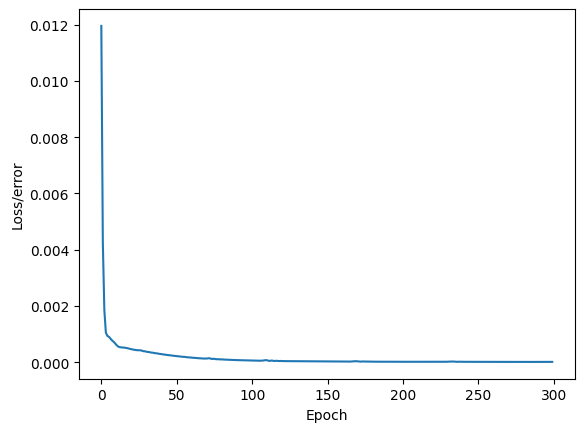

In [27]:
#Plot Loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

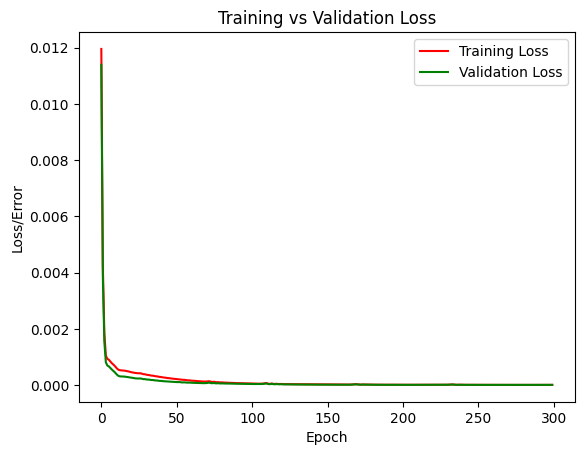

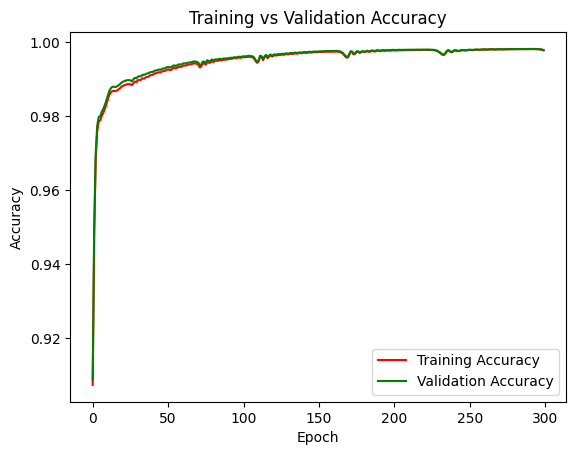

In [28]:
# Plot Loss Comparison
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss', color='red')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='green')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot Training vs Validation Accuracy
plt.figure()
plt.plot(range(epochs), train_accuracies, label='Training Accuracy', color='red')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy', color='green')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [29]:
# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Get predictions
    y_preds = model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = torch.mean(torch.abs(y_preds - y_test))
    print(f'MAE: {mae.item():.4f}')

    # Calculate Mean Squared Error (MSE)
    mse = torch.mean((y_preds - y_test) ** 2)
    print(f'MSE: {mse.item():.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y_test - torch.mean(y_test)) ** 2)
    ss_residual = torch.sum((y_test - y_preds) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f'R-squared: {r_squared.item():.4f}')


MAE: 0.0024
MSE: 0.0000
R-squared: 0.9951


In [30]:
new_input = torch.tensor([[0.25, -0.5, 0.25, -0.25, 0.25, 0.5, -0.25, -0.25]])
max_norm = 487593.39642782

# Disable gradient calculation
with torch.no_grad():
    model.eval()
    # Prediction for new input
    y_pred = model(new_input)
    y_pred_real = y_pred * max_norm
    print(f'Prediction: {y_pred_real}')


    # Print the denormalized prediction
    print(f' Prediction: {y_pred}')


Prediction: tensor([[ 60753.3633,  23624.4512,  58632.8906, -22849.0391,   -103.6958,
          27913.4824,  -2217.2249,  10013.5322,  -7819.5356,  29653.8164,
         -36215.7773, -18012.5762,   5200.7393,  -1110.9513,  61824.4336,
         -20755.9824, -34827.7891,  -3549.7761, -25715.8867,  23803.7773,
          60121.9297,   -431.5345,  -4701.0474, -12045.0254,  12673.7783,
         -30132.6934,    325.8475,  42097.0430,  -2522.2795, -32816.9297,
          12552.5137, -11869.6641,   -973.9791,   2100.5598,  -9027.0850,
          44222.9375]])
 Prediction: tensor([[ 0.1246,  0.0485,  0.1202, -0.0469, -0.0002,  0.0572, -0.0045,  0.0205,
         -0.0160,  0.0608, -0.0743, -0.0369,  0.0107, -0.0023,  0.1268, -0.0426,
         -0.0714, -0.0073, -0.0527,  0.0488,  0.1233, -0.0009, -0.0096, -0.0247,
          0.0260, -0.0618,  0.0007,  0.0863, -0.0052, -0.0673,  0.0257, -0.0243,
         -0.0020,  0.0043, -0.0185,  0.0907]])


In [31]:
# Extracting all weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:  # Only if you want trainable parameters
        print(f'Layer: {name}, Weights: {param.data.numpy()}')


Layer: fc1.weight, Weights: [[ 1.53132096e-01  2.09046140e-01 -2.00001106e-01  4.08152938e-01
  -7.23719150e-02  1.72540754e-01 -3.10147583e-01  2.79396266e-01]
 [ 3.00302714e-01 -2.36512005e-01  2.95937479e-01  7.05903620e-02
   2.71916509e-01  6.74607828e-02  1.57303751e-01 -6.61910474e-02]
 [ 2.72549301e-01  5.22583388e-02 -1.65052831e-01  9.01201591e-02
  -1.62894994e-01 -4.14622128e-02 -1.43598646e-01  2.34537050e-01]
 [-3.46908569e-01 -8.92866775e-02 -1.67658657e-01 -1.41989201e-01
  -4.15581949e-02 -4.17021364e-01  3.87121350e-01 -2.29739636e-01]
 [ 2.29799300e-01  9.14370194e-02 -1.57954007e-01  2.52610356e-01
   4.20153700e-03  2.96747923e-01  3.70978154e-02 -8.31189007e-02]
 [ 7.37648681e-02 -4.61885214e-01  1.27566531e-01  4.28263217e-01
   8.93856138e-02 -4.75423694e-01  5.69351986e-02  2.17139438e-01]
 [ 1.27805591e-01 -1.42237410e-01 -4.01726872e-01  5.86353205e-02
  -4.21108454e-01  2.61098415e-01  2.04208463e-01  2.81858146e-01]
 [ 3.43361944e-02  1.16164245e-01  1.9921

In [32]:
# Access weights directly from each layer
weights_fc1 = model.fc1.weight.data.numpy()
weights_fc2 = model.fc2.weight.data.numpy()
#weights_fc3 = model.fc3.weight.data.numpy()
weights_out = model.out.weight.data.numpy()

print("Weights from fc1:", weights_fc1)
#print("Weights from fc2:", weights_fc2)
#print("Weights from fc3:", weights_fc3)
#print("Weights from output layer:", weights_out)

# Save weights to text files
#np.savetxt('weights_fc1.txt', weights_fc1, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc2.txt', weights_fc2, fmt='%.6f', delimiter=',')
#np.savetxt('weights_fc3.txt', weights_fc3, fmt='%.6f', delimiter=',')
#np.savetxt('weights_output.txt', weights_out, fmt='%.6f', delimiter=',')

Weights from fc1: [[ 1.53132096e-01  2.09046140e-01 -2.00001106e-01  4.08152938e-01
  -7.23719150e-02  1.72540754e-01 -3.10147583e-01  2.79396266e-01]
 [ 3.00302714e-01 -2.36512005e-01  2.95937479e-01  7.05903620e-02
   2.71916509e-01  6.74607828e-02  1.57303751e-01 -6.61910474e-02]
 [ 2.72549301e-01  5.22583388e-02 -1.65052831e-01  9.01201591e-02
  -1.62894994e-01 -4.14622128e-02 -1.43598646e-01  2.34537050e-01]
 [-3.46908569e-01 -8.92866775e-02 -1.67658657e-01 -1.41989201e-01
  -4.15581949e-02 -4.17021364e-01  3.87121350e-01 -2.29739636e-01]
 [ 2.29799300e-01  9.14370194e-02 -1.57954007e-01  2.52610356e-01
   4.20153700e-03  2.96747923e-01  3.70978154e-02 -8.31189007e-02]
 [ 7.37648681e-02 -4.61885214e-01  1.27566531e-01  4.28263217e-01
   8.93856138e-02 -4.75423694e-01  5.69351986e-02  2.17139438e-01]
 [ 1.27805591e-01 -1.42237410e-01 -4.01726872e-01  5.86353205e-02
  -4.21108454e-01  2.61098415e-01  2.04208463e-01  2.81858146e-01]
 [ 3.43361944e-02  1.16164245e-01  1.99214637e-01 -

In [33]:
# Access biases directly from each layer
bias_fc1 = model.fc1.bias.data.numpy()
bias_fc2 = model.fc2.bias.data.numpy()
#bias_fc3 = model.fc3.bias.data.numpy()
bias_out = model.out.bias.data.numpy()

print("Biases from fc1:", bias_fc1)
print("Biases from fc2:", bias_fc2)
#print("Biases from fc3:", bias_fc3)
print("Biases from output layer:", bias_out)

#np.savetxt('Biases1.txt', bias_fc1.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases2.txt', bias_fc2.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('Biases3.txt', bias_fc3.reshape(1, -1), fmt='%.6f', delimiter=',')
#np.savetxt('BiasesOut.txt', bias_out.reshape(1, -1), fmt='%.6f', delimiter=',')

Biases from fc1: [ 9.31864604e-02 -2.88063228e-01 -2.23709017e-01 -3.64631236e-01
  3.10582697e-01  8.14934894e-02  1.39523029e-01 -8.87821019e-02
  5.80438375e-02  2.25011036e-01 -8.96311924e-02  1.41466752e-01
  1.84650794e-01 -3.06958616e-01  7.19677582e-02 -1.43193072e-02
  7.20818201e-03  9.36085433e-02  1.43933728e-01 -2.60969162e-01
 -5.48669361e-02  2.60375649e-01  1.73550829e-01  3.49043665e-04
 -3.32527876e-01  1.09767951e-02 -2.40760490e-01  2.79991120e-01
 -2.14637801e-01 -1.19292311e-01 -7.68639594e-02  2.77718622e-02
  2.35505953e-01  7.49494806e-02  1.34522378e-01  8.59166756e-02
  2.84235686e-01 -1.70877129e-01 -7.90745690e-02  1.52295455e-01
 -9.03647467e-02  1.89977512e-01  5.31769656e-02 -5.25626130e-02
 -5.40430192e-03  2.81270873e-02  1.42797813e-01  3.05661201e-01
  1.80937156e-01  2.95635343e-01  8.11055526e-02 -3.20590846e-02
 -3.16038996e-01 -2.28604198e-01 -3.11568350e-01 -1.07933626e-01
 -4.06781763e-01 -3.66105586e-01 -2.63829231e-01 -3.48544896e-01
 -2.1701

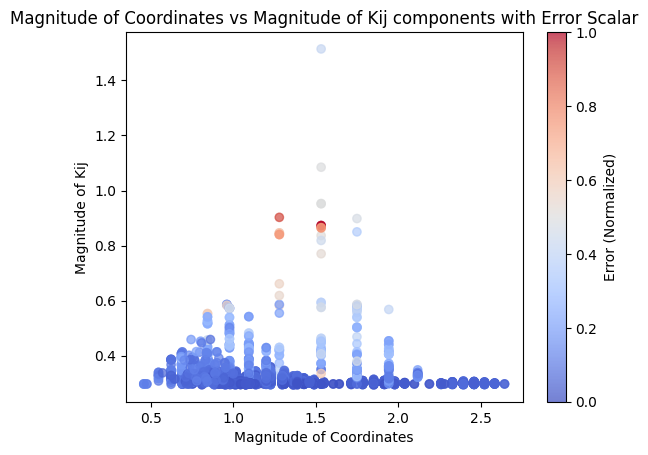

In [36]:
# Evaluate performance: Plot Magnitude Coord vs Magnitude DU with Error Scalar
coord_magnitudes = np.linalg.norm(my_df.iloc[:, 1:8].values, axis=1)
Ke_magnitudes = np.linalg.norm(my_df.iloc[:, 9:].values, axis=1)

# Compute errors for each row
errors = []
with torch.no_grad():
    model.eval()
    for idx in range(len(my_df)):
        input_tensor = torch.FloatTensor(my_df.iloc[idx, :8].values).unsqueeze(0)
        true_output = torch.FloatTensor(my_df.iloc[idx, 8:].values).unsqueeze(0)
        predicted_output = model(input_tensor)
        error = torch.mean(torch.abs(predicted_output - true_output)).item()
        errors.append(error)

# Normalize errors for color mapping
errors = np.array(errors)
normalized_errors = (errors - np.min(errors)) / (np.max(errors) - np.min(errors))

plt.figure()
scatter = plt.scatter(coord_magnitudes, Ke_magnitudes, c=normalized_errors, cmap='coolwarm', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Error (Normalized)')
plt.xlabel('Magnitude of Coordinates')
plt.ylabel('Magnitude of Kij')
plt.title('Magnitude of Coordinates vs Magnitude of Kij components with Error Scalar')
plt.grid(False)
plt.show()